다항 회귀(polynomial regression): 비선형 데이터를 학습하는데, 선형모델 사용하는 것.

In [35]:
import numpy as np

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m ,1) - 3 # 6(0~1) -> 0 ~ 6 -> -3 ~ 3값 생성
y = 0.5 * X **2 + X + 2 + np.random.randn(m, 1)

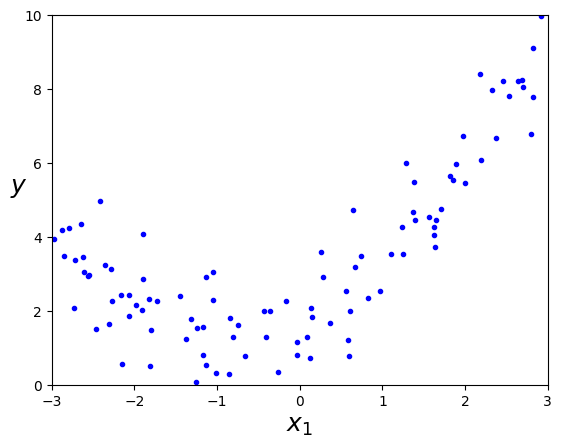

In [36]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

2차원 데이터 생성 후, 시각화.

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


직선으로는 위 데이터 형태가 맞지 않음. 그래서 PolynomialFeatures 사용.
<br>
출력 결과 확인해보면, X_1 값은 -0.7527, &nbsp; &nbsp; &nbsp;     X_1^2값은 0.566646.

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [39]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

이차 방정식 식을,
<br>
y = θ_0 + θ_1 * x_1 + θ_2 * x_1 ^ 2라고 하면, 
<br>
θ_0값이 1.7813, θ_1값이 0.93366, θ_2값이 0.5645

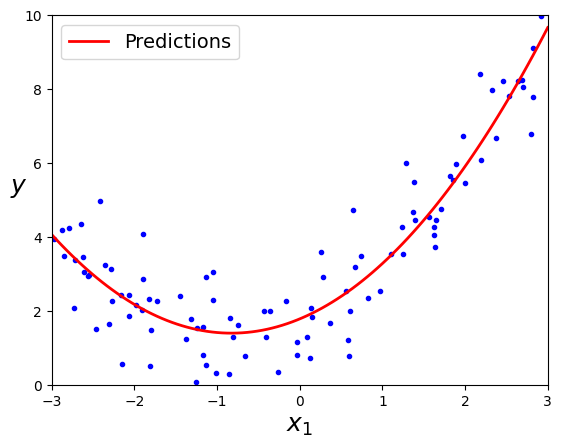

In [40]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)     # 새로운 샘플 100개
X_new_poly = poly_features.transform(X_new)       # 2차 다항 회귀 모델 데이터로 변환
y_new = lin_reg.predict(X_new_poly)               # 예측하기

plt.plot(X, y, "b.")                                            # 기존 데이터 산점도
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")  # 예값 그래프

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

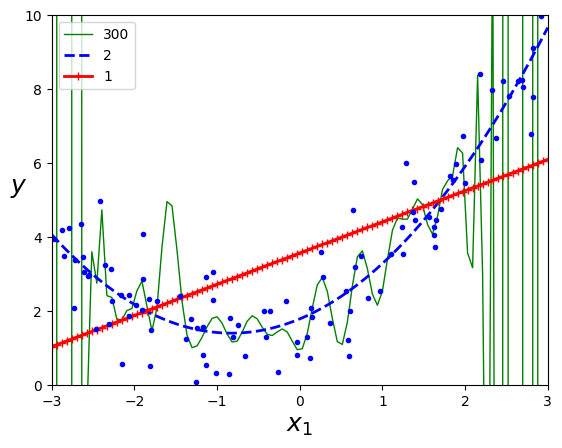

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 세 개의 다항 회귀 모델 지정: 차례 대로 300차 다항 회귀, 2차 다항 회귀, 1차 선형 회귀 모델의 예측값 그래프 그리기
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):   
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)  # 다항 특성 변환기
    std_scaler = StandardScaler()                                             # 표준화 축척 조정
    lin_reg = LinearRegression()                                              # 선형 회귀 모델
    
    polynomial_regression = Pipeline([                         # 파이프라인: 전처리 + 선형 회귀 모델
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)                                            # 훈련
    y_newbig = polynomial_regression.predict(X_new)                            # 예측
    
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)       # 그래프 그리기

plt.plot(X, y, "b.", linewidth=3)                                              # 원 데이터 산점도
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

고차 다항 회귀 확인.
<br>
300차항 확인 결과 훈련데이터에 '과대적합', 선형 모델은 너무 '과소적합'.
<br>
가장 잘 맞는 것은 '2차 다항 회귀' 모델.

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train_set') # 위에 MSE만들어 줬는데, RMSE로 만드려고, 앞에 sqrt.
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val_set')
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)         

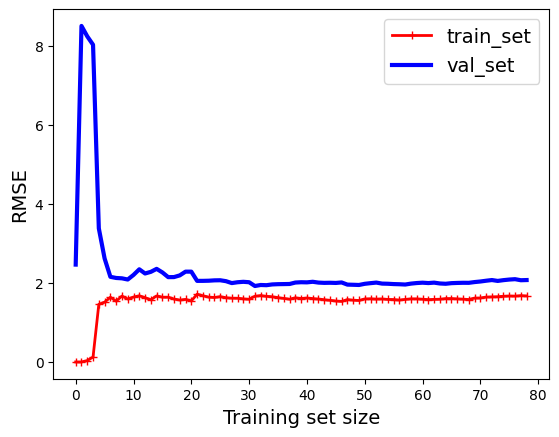

In [43]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

'학습곡선'
<br>
훈련세트를 보면, 0에서 시작할때는 완벽하게 작동. 하지만 샘플 추가되면서 점점 오차값 증가.
<br>
검증 세트에서는 훈련 샘플이 추가되면서 점점 오차 감소하는 것 확인. 결국
train_set과 val_set이 1.5 ~ 2사이의 오차값에 수렴하는 것을 알 수 있다.
<br>
이는 과소적합되었다는 것을 알 수 있음.

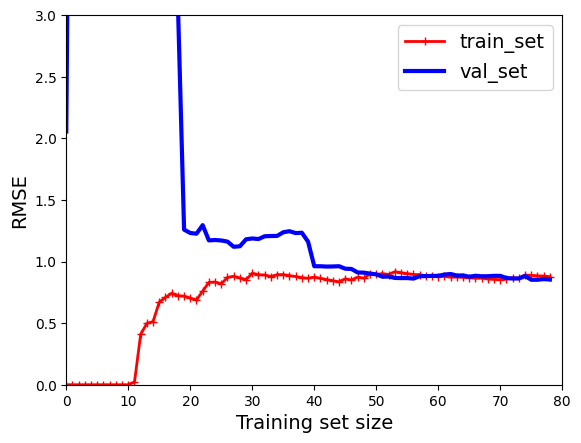

In [44]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

10차 다항 회귀로 학습곡선 확인.
<br>
1. 훈련셋의 오차가 검증셋보다 오차가 작다.
2. 두 곡선 사이에 빈 공간. 과대적합 되었다는 뜻.
3. 둘다 오차값이 큼.
<br>
but 훈련 데이터 추가하면, 점점 두 곡선 수렴하게 됨.

편향 / 분산 트레이드오프
<br>
편향: 잘못된 가정으로 나온것(2차 데이터인데, 1차로 가정) -> 훈련데이터에 과소적합.
<br>분산: 모델이 과도하게 민감 반응(고차다항 회귀모델) -> &nbsp;높은 분산&nbsp; -> 훈련데이터에 과대적합
<br> 줄일수없는 오차(data자체가 잘못된 것): 데이터 잡음 제거로 해결
<br>
<br>
<br>
모델 복잡도 커지면 분산 늘어나고 편향 줄어듦, 복잡도 줄어드면 분산 작아지고 편향 커짐.
<br>
<br>
그래서 '트레이드오프' 라고 부름.

규제: 과대적합 감소시키는 방식.
<br>
<br>
자유도 줄이기(다항식 차수 감수시키기)로 과대적합 예방.
<br>
<br>
대표적 '릿지회귀' '라쏘회귀' '엘라스틱넷' 존재.

릿지회귀:
<br>
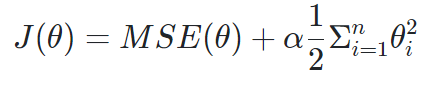
<br>
규제항(L2노름)이 함수에 추가된 방식. 가중치 최대한 작게 유지.

In [45]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5     # 1차 선형회귀 모델을 따로도록 함. 단, 잡음 추가됨.
X_new = np.linspace(0, 3, 100).reshape(100, 1)    # 0~3 구간에서 균등하게 100개의 검증 데이터 선택

In [46]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) #solver = 'cholesky'가 정규방정식 이용해서 최적의 파라미터값 계산하는 것.
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [47]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42) #solver = 'sag'가 위와 같이 최적 파라미터값 찾는 것. 개선된 것.
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

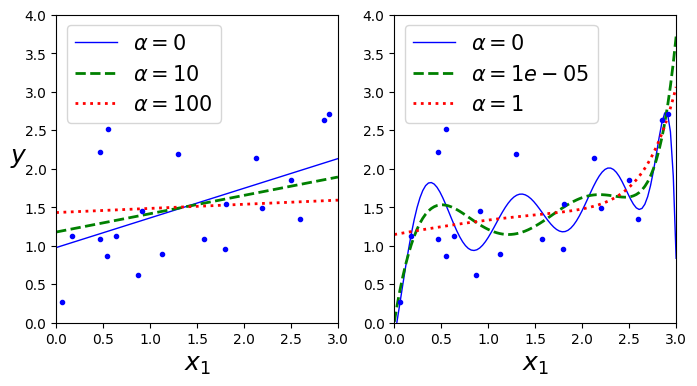

In [48]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),           # 표준화 축척 조정
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

왼쪽은 그냥 릿지회귀 적용시킨 것.
<br>
PolynomialFeatures(degree=10), StandardScaler를 사용한 후 릿지회귀 적용한 것.
<br>
알파값 증가하면서, 직선에 가까워 지는 것 확인 가능.
<br>
분산은 줄어들고, 편향은 커지게 됨(오버피팅 막음).

In [49]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver ='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [50]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46619232])

릿지회귀 정규방정식 값 확인 법.
<br>
첫번째는 그냥 solver ='cholesky' 쓰는 것.
<br>
두번째는 SGDRegressor(확률 경사 하강법)에서 L2노름으로 설정해준 것.

라쏘회귀:
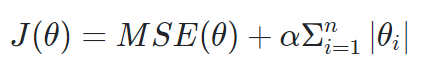
<br>
규제항이 L2가 아닌, L1노름.

In [51]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


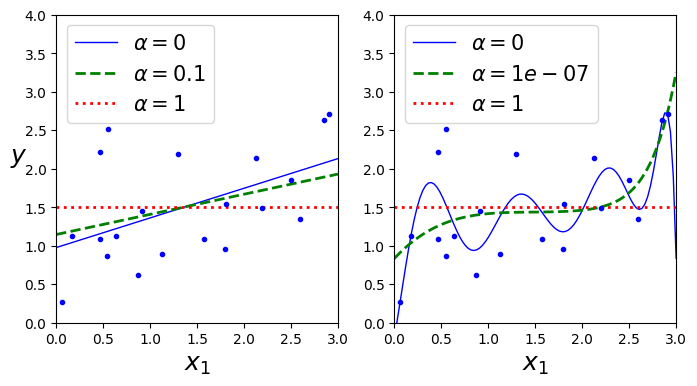

In [52]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

라쏘회귀 적용시킨 것.
<br>
알파값 증가하면서, 직선에 가까워 지는 것 확인 가능.
<br>
분산은 줄어들고, 편향은 커지게 됨 -> 오버피팅 막는 릿지 회귀의 또 다른 방식.

라쏘회귀는 덜 중요한 특성의 가중치는 제거하려는 특성(가중치 0으로)
<br>
그래프 확인해보면, 차수가 높아지니 가중치 0으로.
<br>
<br>
----> 자동으로 특성 선택하고 '희소모델' (0아닌 특성 가중치 적은 것)만든다.

In [53]:
# 도표에 사용되는 좌표값 모음
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

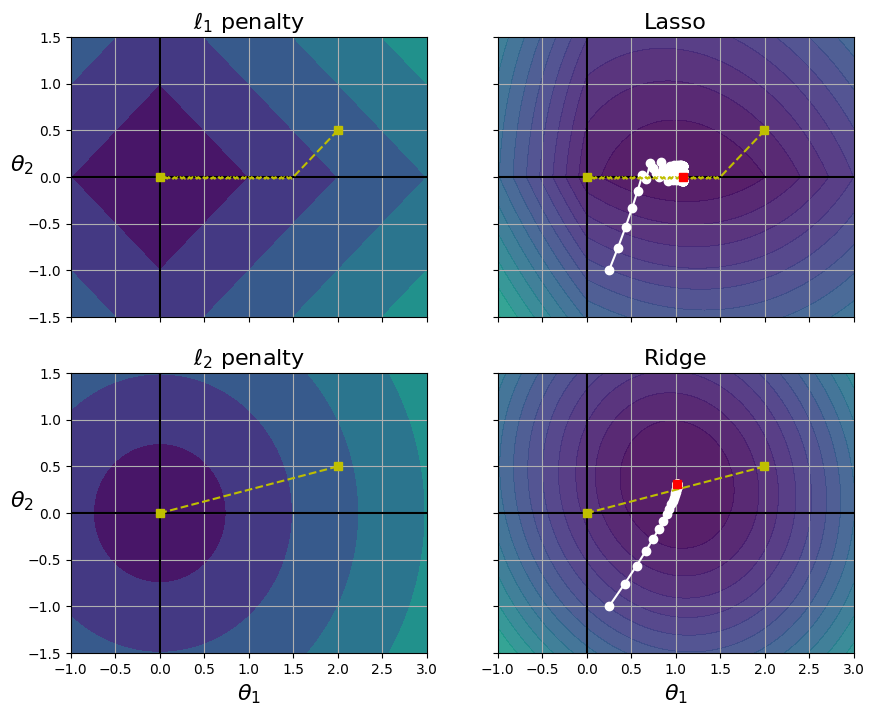

In [54]:
# 파라미터(theta) 경로 기억 어레이 생성 함수
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]
    
    # 좌측 도표 등고선 용도
    levelsN=np.linspace(0, np.max(N), 10)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    
    # 라쏘 또는 릿지 회귀 경사하강법 파라미터 경로
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    
    # l1 노름 또는 l2 노름 경사하강법 경로
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)
    
    # 좌측 도표(상단: 라쏘, 하단: 릿지)
    ax = axes[i, 0] 
    ax.grid(True)
    ax.axhline(y=0, color='k')                                     # x 축
    ax.axvline(x=0, color='k')                                     # y 축
    ax.contourf(t1, t2, N / 2., levels=levelsN)                    # 등고선
    
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")                     # 노랑 점선
    ax.plot(0, 0, "ys")                                            # 원점
    ax.plot(t1_min, t2_min, "ys")                                  # 좌표 (2, 1)
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    # 우측 도표(상단: 라쏘, 하단: 릿지)
    ax = axes[i, 1]   
    ax.grid(True)
    ax.axhline(y=0, color='k')                                      # x 축
    ax.axvline(x=0, color='k')                                      # y 축
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)             # 등고선
    
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")                    # 흰색 점실선
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")                      # 노랑 점선
    ax.plot(0, 0, "ys")                                             # 원점
    ax.plot(t1_min, t2_min, "ys")                                   # 좌표 (2, 1)
    ax.plot(t1r_min, t2r_min, "rs")                                 # 빨강 점
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
        
plt.show()

경사하강법을 실행하면 두 파라미터가 동일하게 감소함
<br>
gradient가 0에 도달할 때까지 진동하면서 내려감.
<br>
<br>L1loss는 0에서 정의되지 않기 때문에 진동.
<br>L2loss는 원점까지 직선 경로를 따라서 내려감.
<br>
릿지는 파라미터가 global minima에 가까워질수록 gradient가 작아짐
<br>
gradient descent가 자동으로 느려지고 수렴에 도움이 됨(진동 X)
<br>
α를 증가시킬수록 최적의 파라미터가 원점에 가까워짐
<br>
하지만 완전히 0이 되지는 않음

라쏘 비용함수는 θ_i = 0에서 미분이 안됨. 그래서 '서브그레이디언트 벡터(g)'를 쓰면 경사하강법 적용 가능.

In [55]:
from sklearn.linear_model import Lasso
Lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [56]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty = 'l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46938541])

Lasso 값 확인하는 두가지 방법. 릿지와 거의 비슷.

엘라스틱넷: 릿지회귀, 라쏘회귀 절충 모델.
<br>
엘라스틱넷 규제항: 릿지 규제항 + 라쏘 규제항(혼합비율 r로 조절-> r = 0 릿지, r = 1 라쏘)
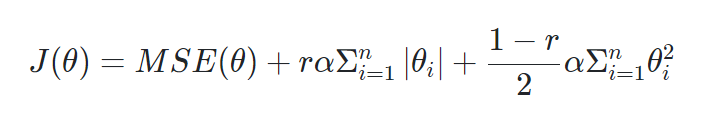

릿지회귀가 기본.
<br>
특성 수 > 훈련샘플 수, 특성 몇개 강한 연관 -> 엘라스티넷.

In [57]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5) # lr_ratio가 혼합비율. 지금은 0.5로
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

조기종료(early stopping): 검증에러가 최솟값 도달하면 훈련 중지하는 것.

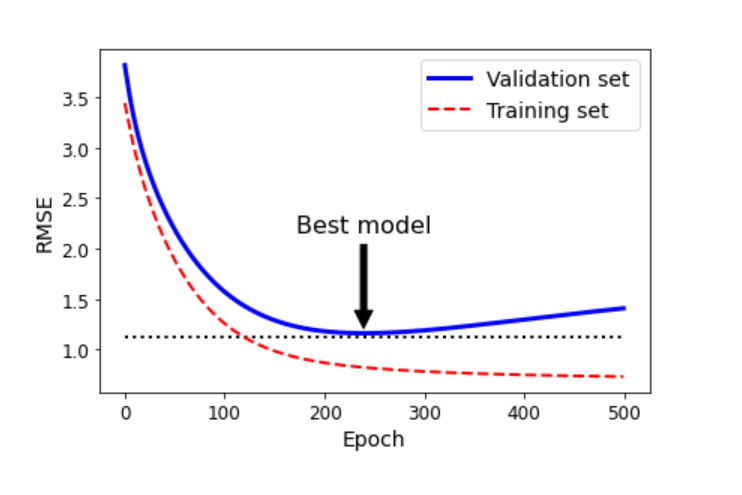
<br>
조기종료 구간.
<br>
곡선이 매끄럽지 않아서 확인하기 어려울때, 검증에러가 일정시간동안 최솟값보다 클때, 학습 멈추고, 검증에러값이 최소였을 떄로 되돌리는 방식 사용.

로지스틱 회귀: 샘플이 특정 클래스에 속할 확률을 추정하는데 사용.

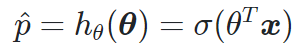
<br>
0 ~ 1사이 값을 출력하는 시그모이드 함수.

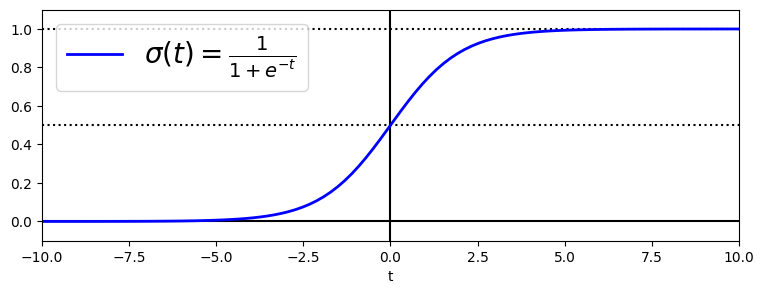

In [58]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

0.5 기준으로 양성클래스(1), 음성클래스(0) 판단.

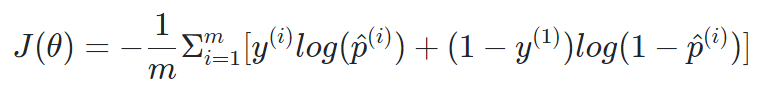
<br>
전체 훈련세트에 대한 비용함수.

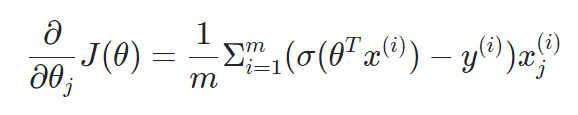
<br>
로지스틱 함수의 편도함수

In [59]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [60]:
X = iris['data'][:, 3:] # 꽃잎 너비를 X로.
y = (iris['target'] == 2).astype(int) # virginica일때 1. 그렇지 않으면 0

결정경계 위해서 iris 데이터 불러오기.
<br>
(150, 4) 모양의 넘파이 배열.
<br>150: 150개의 iris샘플
<br>4: 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비. -> 총 4개

In [61]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

/usr/local/lib/python3.10/dist-packages/matplotlib/patches.py:1475: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


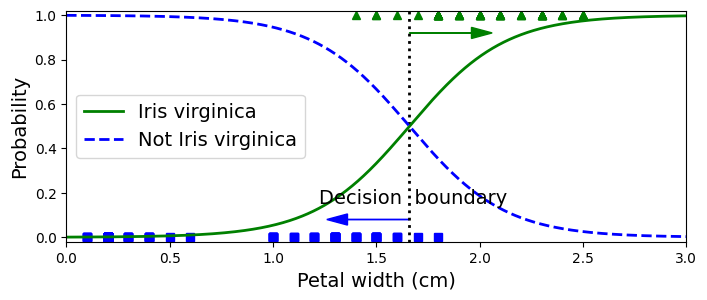

In [62]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

1.6cm 근방 '결정경계'

In [63]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

결정경계(1.6)기준으로 양성 인지 음성인지 확인.

In [64]:
X = iris["data"][:, (2, 3)]                  # 꽃잎 길이와 너비
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

<ipython-input-64-01ac50366499>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


LogisticRegression(C=10000000000, random_state=42)

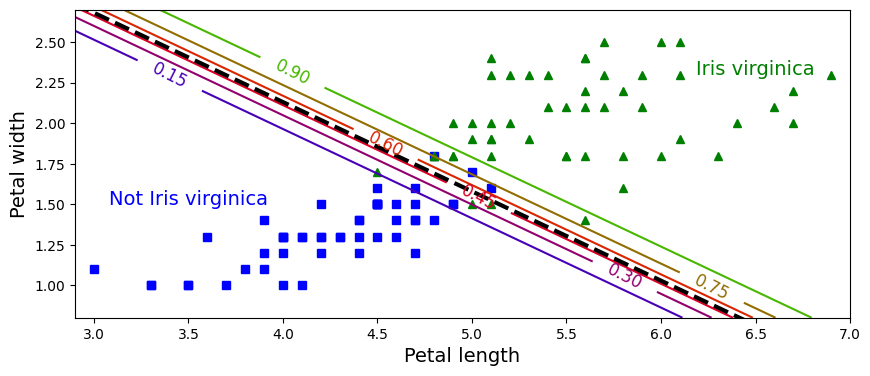

In [65]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

0.15이하는 iris_virginica 아니라고 판단. 0.9 이상은 iris_virginica로 판단.
<br>
가운데 검정 점선이 결정경계(0.5)

소프트맥스 회귀 = 다항 로지스틱 회귀
<br>
각 클래스에 점수 계산하고, 그 점수에 소프트맥스 함수 적용 -> 확률 추정.
<br>
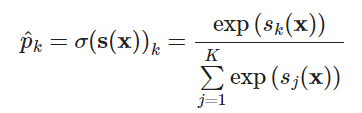
<br>


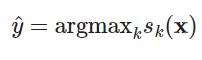
<br>
소프트맥스 회귀도 추정확률 가장 높은 클래스를 선택하는데,
<br> 여기 argmax()함수가 그런 역할

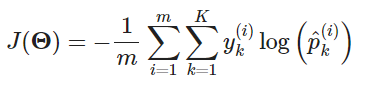
<br>
크로스엔트로피 함수: 타겟 클래스를 높은 확률로 추정해야 하는데, 타겟 클래스를 낮은 확률로 예측하는 것을 억제.
<br>
softmax결과와 원핫인코딩 결과를 곱하고 다 더한다는 식.

쿨백-라이블러 발산: 맑음을 0으로 인코딩, 다른 걸 1로 시작하는 4비트짜리 값으로 표현, 그런데 비가 게속 온다면(가정이 틀렸다면), 크로스엔트로피값 커지는 것.

In [66]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

LogisticRegression은 클래스 두개 이상일 때, 일대다(OvA)전략 사용.
<br>
위처럼 multi_class = 'multinomial'로 주면, 소프트맥스 회귀로.
<br>
좀 특이한건, 소프트맥스 회귀 지원하는 알고리즘 'lbfgs'로 주어야 함.

In [68]:
print(softmax_reg.predict([[5, 2]]))

print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


꽃잎 길이 5, 너비 2로 가정하면 94퍼센트 확률로 iris-virginica(클래스 2) 추정, 5.7 확률로 iris-versicolor로 추정.

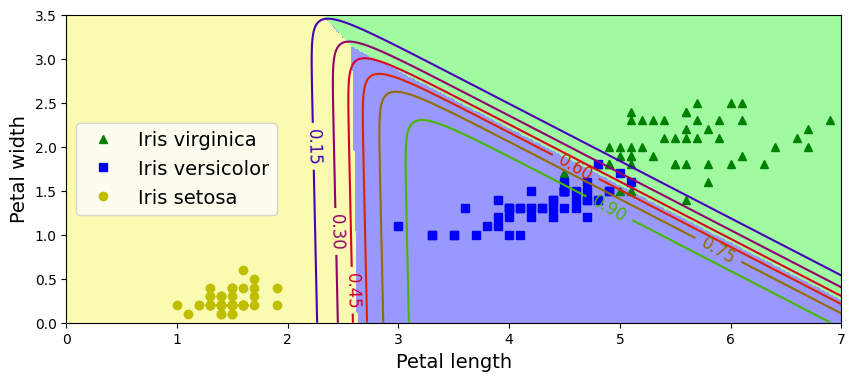

In [69]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

각각의 결정경계 쉽게 확인 가능. 모든 결정경계가 만나는 지점은 0.33 지점.